<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%206/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Classification

###*BY FIBIN MN*

# STEP 1: Install and Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from google.colab import files
import io

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


# STEP 2: Upload Dataset from Local Storage

In [2]:
print("\n" + "="*50)
print("UPLOAD YOUR DATASET (CSV/EXCEL)")
print("="*50)

uploaded = files.upload()

# Read the uploaded file
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
elif filename.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    raise ValueError("Please upload a CSV or Excel file")

print(f"\n✓ Dataset '{filename}' loaded successfully!")


UPLOAD YOUR DATASET (CSV/EXCEL)


Saving Iris.csv to Iris.csv

✓ Dataset 'Iris.csv' loaded successfully!


# STEP 3: Explore the Dataset

In [3]:
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


DATASET OVERVIEW

Dataset Shape: (150, 6)
Rows: 150, Columns: 6

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-nul

# STEP 4: Data Preprocessing

In [4]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Separate features and target
# Assuming last column is the target (Species)
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column

# Encode target variable if it's categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y_encoded.shape}")
print(f"Classes: {le.classes_}")
print(f"Number of classes: {len(le.classes_)}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature Normalization (Important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features normalized using StandardScaler")


DATA PREPROCESSING

Features shape: (150, 5)
Target shape: (150,)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Number of classes: 3

Training set size: 120
Testing set size: 30

✓ Features normalized using StandardScaler


# STEP 5: Find Optimal K Value


FINDING OPTIMAL K VALUE


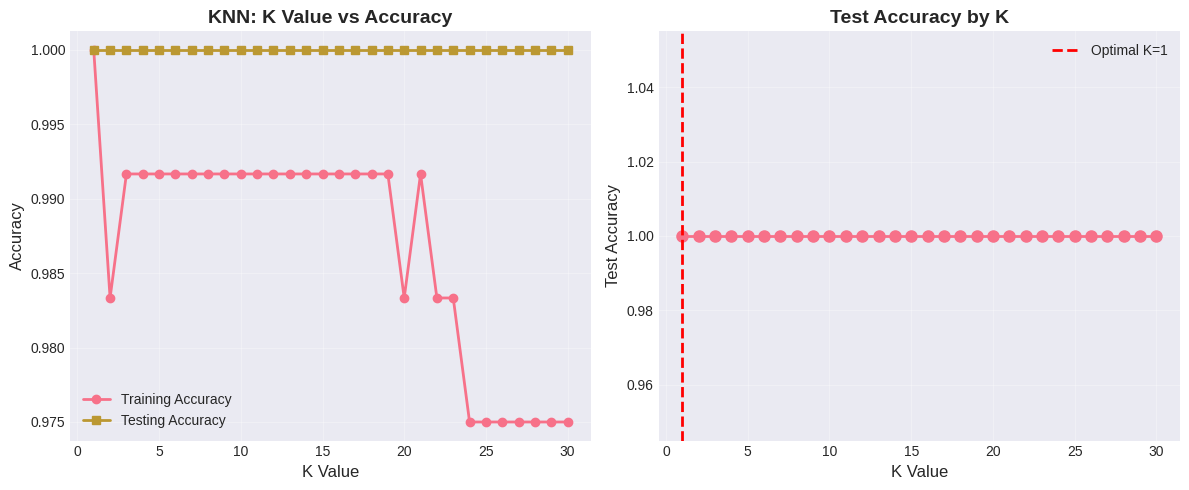


✓ Optimal K Value: 1
✓ Best Test Accuracy: 1.0000


In [5]:
print("\n" + "="*50)
print("FINDING OPTIMAL K VALUE")
print("="*50)

# Test different K values
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot K vs Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(k_range, test_scores, 's-', label='Testing Accuracy', linewidth=2)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN: K Value vs Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal K
optimal_k = k_range[np.argmax(test_scores)]
best_accuracy = max(test_scores)

plt.subplot(1, 2, 2)
plt.plot(k_range, test_scores, 'o-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy by K', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Optimal K Value: {optimal_k}")
print(f"✓ Best Test Accuracy: {best_accuracy:.4f}")

# STEP 6: Train Final KNN Model

In [7]:
print("\n" + "="*50)
print("TRAINING FINAL KNN MODEL")
print("="*50)

# Train with optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = knn_final.predict(X_train_scaled)
y_test_pred = knn_final.predict(X_test_scaled)

print(f"\n✓ Model trained with K={optimal_k}")


TRAINING FINAL KNN MODEL

✓ Model trained with K=1


# STEP 7: Model Evaluation


MODEL EVALUATION

Training Accuracy: 1.0000 (100.00%)
Testing Accuracy: 1.0000 (100.00%)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



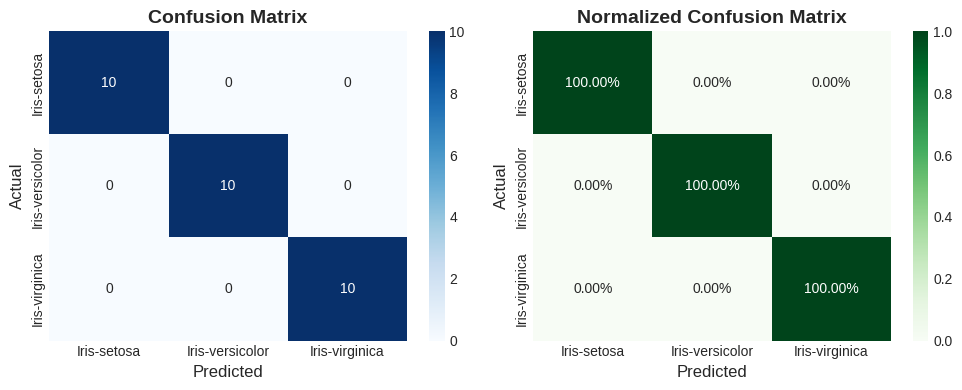

In [8]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print("="*50)
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

plt.subplot(1, 2, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# STEP 8: Decision Boundary Visualization


DECISION BOUNDARY VISUALIZATION


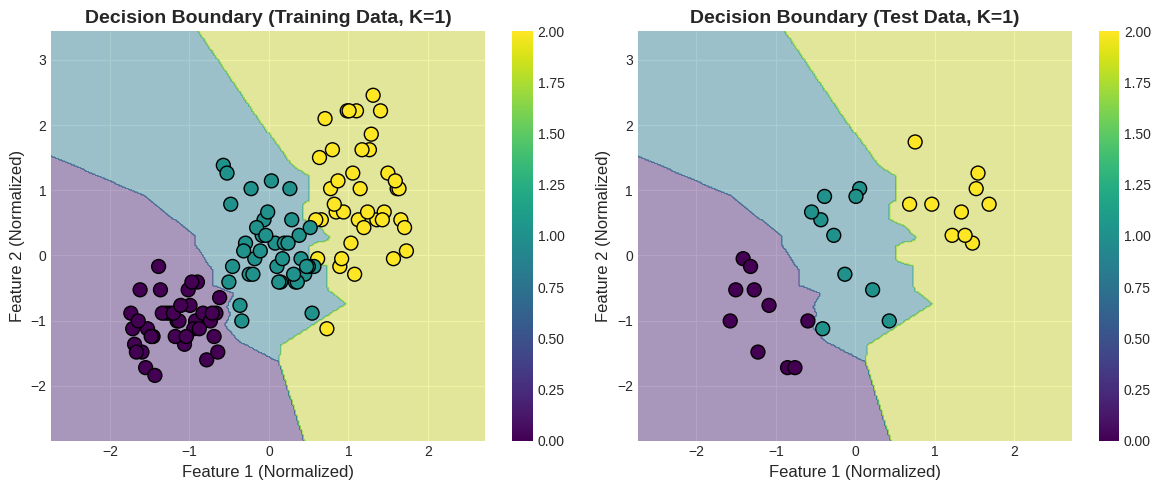


✓ Decision boundaries visualized for first 2 features


In [9]:
print("\n" + "="*50)
print("DECISION BOUNDARY VISUALIZATION")
print("="*50)

# Visualize decision boundaries for first two features
if X.shape[1] >= 2:
    # Train KNN on first 2 features for visualization
    X_2d_train = X_train_scaled[:, :2]
    X_2d_test = X_test_scaled[:, :2]

    knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_2d.fit(X_2d_train, y_train)

    # Create mesh grid
    h = 0.02  # step size
    x_min, x_max = X_2d_train[:, 0].min() - 1, X_2d_train[:, 0].max() + 1
    y_min, y_max = X_2d_train[:, 1].min() - 1, X_2d_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh grid
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1],
                         c=y_train, cmap='viridis', edgecolor='black', s=100)
    plt.xlabel(f'Feature 1 (Normalized)', fontsize=12)
    plt.ylabel(f'Feature 2 (Normalized)', fontsize=12)
    plt.title(f'Decision Boundary (Training Data, K={optimal_k})',
              fontsize=14, fontweight='bold')
    plt.colorbar(scatter)

    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = plt.scatter(X_2d_test[:, 0], X_2d_test[:, 1],
                         c=y_test, cmap='viridis', edgecolor='black', s=100)
    plt.xlabel(f'Feature 1 (Normalized)', fontsize=12)
    plt.ylabel(f'Feature 2 (Normalized)', fontsize=12)
    plt.title(f'Decision Boundary (Test Data, K={optimal_k})',
              fontsize=14, fontweight='bold')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Decision boundaries visualized for first 2 features")

# STEP 9: Distance Analysis

In [10]:
print("\n" + "="*50)
print("EUCLIDEAN DISTANCE ANALYSIS")
print("="*50)

# Show distances for a sample prediction
sample_idx = 0
sample_point = X_test_scaled[sample_idx].reshape(1, -1)
distances, indices = knn_final.kneighbors(sample_point)

print(f"\nSample Test Point Index: {sample_idx}")
print(f"Actual Class: {le.classes_[y_test[sample_idx]]}")
print(f"Predicted Class: {le.classes_[y_test_pred[sample_idx]]}")
print(f"\nK={optimal_k} Nearest Neighbors:")
print("-" * 40)

for i, (dist, idx) in enumerate(zip(distances[0], indices[0]), 1):
    neighbor_class = le.classes_[y_train[idx]]
    print(f"Neighbor {i}: Distance={dist:.4f}, Class={neighbor_class}")


EUCLIDEAN DISTANCE ANALYSIS

Sample Test Point Index: 0
Actual Class: Iris-setosa
Predicted Class: Iris-setosa

K=1 Nearest Neighbors:
----------------------------------------
Neighbor 1: Distance=0.5246, Class=Iris-setosa


# STEP 10: Summary and Key Insights

In [11]:
print("\n" + "="*50)
print("KEY INSIGHTS & SUMMARY")
print("="*50)

print(f"""
📊 Dataset Summary:
   - Total Samples: {df.shape[0]}
   - Features: {X.shape[1]}
   - Classes: {len(le.classes_)} {list(le.classes_)}

🎯 Model Performance:
   - Optimal K: {optimal_k}
   - Training Accuracy: {train_accuracy*100:.2f}%
   - Testing Accuracy: {test_accuracy*100:.2f}%
   - Overfitting: {'Yes' if train_accuracy - test_accuracy > 0.1 else 'No'}

💡 What You Learned:
   ✓ Instance-based learning (lazy learning)
   ✓ Euclidean distance calculation
   ✓ K selection and its impact
   ✓ Feature normalization importance
   ✓ Model evaluation metrics
   ✓ Decision boundary visualization

🔍 KNN Characteristics:
   - Non-parametric algorithm
   - No training phase (stores all data)
   - Sensitive to feature scaling
   - Computational cost increases with data size
""")

print("="*50)
print("✓ ANALYSIS COMPLETE!")
print("="*50)


KEY INSIGHTS & SUMMARY

📊 Dataset Summary:
   - Total Samples: 150
   - Features: 5
   - Classes: 3 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

🎯 Model Performance:
   - Optimal K: 1
   - Training Accuracy: 100.00%
   - Testing Accuracy: 100.00%
   - Overfitting: No

💡 What You Learned:
   ✓ Instance-based learning (lazy learning)
   ✓ Euclidean distance calculation
   ✓ K selection and its impact
   ✓ Feature normalization importance
   ✓ Model evaluation metrics
   ✓ Decision boundary visualization

🔍 KNN Characteristics:
   - Non-parametric algorithm
   - No training phase (stores all data)
   - Sensitive to feature scaling
   - Computational cost increases with data size

✓ ANALYSIS COMPLETE!
